In [2]:
import cv2
import numpy as np
import PIL
import PIL.Image
import os

In [4]:
# Histograme Equalization
def extract_color_histogram_hsv_clahe(img, limit=4.0, size=5): # take RGB, return RGB
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    clahe = cv2.createCLAHE(clipLimit=limit, tileGridSize=(size,size))
    img_yuv[:,:,2] = clahe.apply(img_yuv[:,:,2])
    equ = cv2.cvtColor(img_yuv, cv2.COLOR_HSV2RGB)
    return equ

# HSV mask
def transform_image_hsv(image): # take RGB, return RGB
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, (10, 30, 30), (163, 255, 255))
    ## slice the green
    green = cv2.bitwise_and(image, image, mask=mask)
    return green
    

def transform_image_gabor(target_image): # agnostic
    kernel_size = (21, 21)
    p_sigma = 1.7
    p_lambda = 5
    p_gamma = 0.5
    p_psi = 0.0

    gabor_kernels = []
    for p_theta in np.arange(0, np.pi, np.pi/8):
        gabor_kernel = cv2.getGaborKernel(kernel_size, p_sigma, p_theta, p_lambda, p_gamma, p_psi, ktype=cv2.CV_32F)
        gabor_kernel /=1.5*gabor_kernel.sum()
        gabor_kernels.append(gabor_kernel)
    
    filtered_image = np.zeros_like(target_image)
    for kernel in gabor_kernels:
        intermediate_result = cv2.filter2D(target_image, -1, kernel)
        np.maximum(filtered_image, intermediate_result, filtered_image)
    return filtered_image

def apply_filters(image): #takes in BGR, returns BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    app_f1_img = extract_color_histogram_hsv_clahe(image)
    app_f2_img = transform_image_hsv(app_f1_img)
    filtered_img = transform_image_gabor(app_f2_img)
    filtered_img = cv2.cvtColor(filtered_img, cv2.COLOR_RGB2BGR)
    return filtered_img
    

def transform_all_images(parent_dir, target_parent_directory):
    for directory in os.listdir(parent_dir):
        print("\nStarting for dir", directory)
        for category in os.listdir(parent_dir + "\\" + directory):
            for name in os.listdir(parent_dir + "\\" + directory + "\\" + category):
                filename = parent_dir + "\\" + directory + "\\" + category + "\\" + name
                result_filename = target_parent_directory + "\\" + directory + "\\" + category + "\\" + name
                target_image = cv2.imread(filename)
                filtered_image = apply_filters(target_image)
                cv2.imwrite(result_filename, filtered_image)
            print("Class: " + category + " done.")

In [5]:
transform_all_images("final_images", "final_images_filtered")


Starting for dir test
Class: chinese_apple done.
Class: lantana done.
Class: negative done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.

Starting for dir train
Class: chinese_apple done.
Class: lantana done.
Class: negative done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.

Starting for dir validation
Class: chinese_apple done.
Class: lantana done.
Class: negative done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.


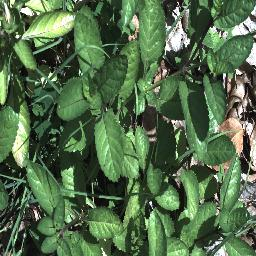

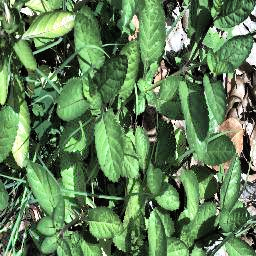

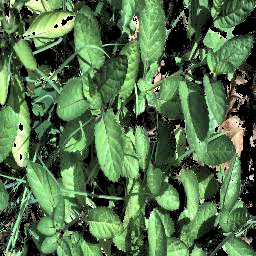

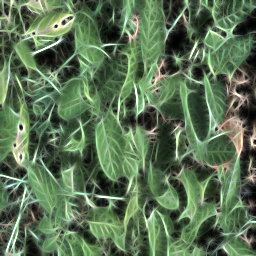

In [307]:
filename = 'final_images/train/snake_weed/20170217-114813-0.jpg'
new_filename = 'final_images_filtered/train/snake_weed/20170217-114813-0.jpg'

target_image = cv2.imread(filename)
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
display(PIL.Image.fromarray(target_image))

app_f1_img = extract_color_histogram_hsv_clahe(target_image)
display(PIL.Image.fromarray(app_f1_img))

app_f2_img = transform_image_hsv(app_f1_img)
display(PIL.Image.fromarray(app_f2_img))

filtered_img = transform_image_gabor(app_f2_img)
display(PIL.Image.fromarray(filtered_img))

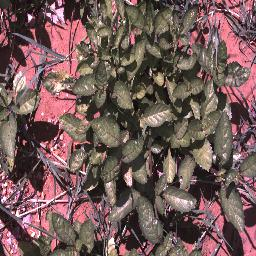

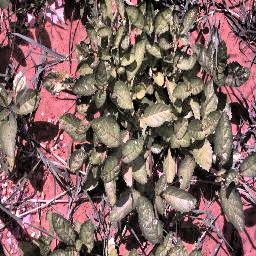

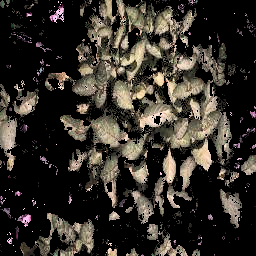

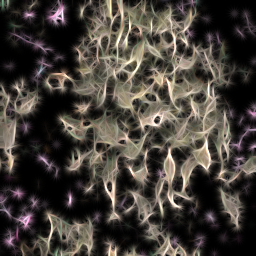

In [308]:
filename = 'final_images/train/snake_weed/20170217-114451-0.jpg'
new_filename = 'final_images_filtered/train/snake_weed/20170217-114451-0.jpg'

target_image = cv2.imread(filename)
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
display(PIL.Image.fromarray(target_image))

app_f1_img = extract_color_histogram_hsv_clahe(target_image)
display(PIL.Image.fromarray(app_f1_img))

app_f2_img = transform_image_hsv(app_f1_img)
display(PIL.Image.fromarray(app_f2_img))

filtered_img = transform_image_gabor(app_f2_img)
display(PIL.Image.fromarray(filtered_img))

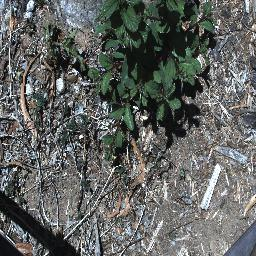

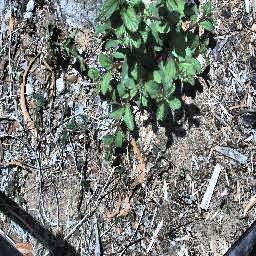

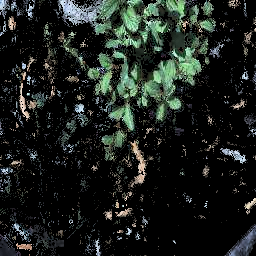

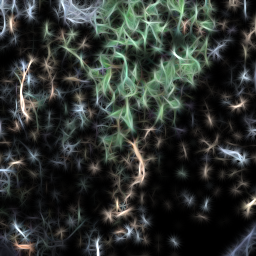

In [309]:
filename = 'final_images/train/chinese_apple/20161207-110753-0.jpg'
new_filename = 'final_images_filtered/train/chinese_apple/20161207-110753-0.jpg'

target_image = cv2.imread(filename)
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
display(PIL.Image.fromarray(target_image))

app_f1_img = extract_color_histogram_hsv_clahe(target_image)
display(PIL.Image.fromarray(app_f1_img))

app_f2_img = transform_image_hsv(app_f1_img)
display(PIL.Image.fromarray(app_f2_img))

filtered_img = transform_image_gabor(app_f2_img)
display(PIL.Image.fromarray(filtered_img))

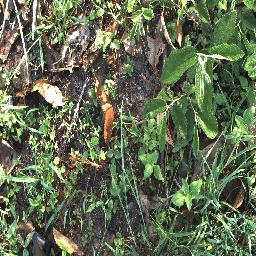

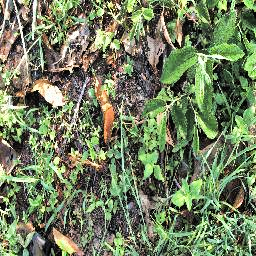

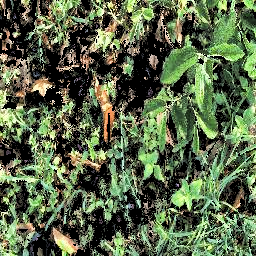

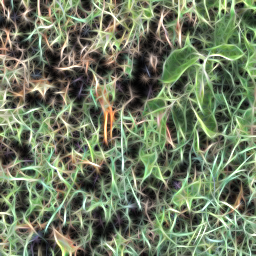

In [7]:
filename = 'final_images/train/negative/20170128-102357-0.jpg'
new_filename = 'final_images_filtered/train/negative/20170128-102357-0.jpg'

target_image = cv2.imread(filename)
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
display(PIL.Image.fromarray(target_image))

app_f1_img = extract_color_histogram_hsv_clahe(target_image)
raw_trans = extract_color_histogram_hsv_clahe(target_image)
display(PIL.Image.fromarray(app_f1_img))

app_f2_img = transform_image_hsv(app_f1_img)
display(PIL.Image.fromarray(app_f2_img))

filtered_img = transform_image_gabor(app_f2_img)
display(PIL.Image.fromarray(filtered_img))

In [8]:
# transform individually

def apply_filters_select(image, select=0): #takes in BGR, returns BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if select == 0:
        result = extract_color_histogram_hsv_clahe(image)
    elif select == 1:
        result = transform_image_hsv(image)
    elif select == 2:
        result = transform_image_gabor(image)
    result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
    return result

def transform_all_images(parent_dir, target_parent_directory1, target_parent_directory2, target_parent_directory3):
    for directory in os.listdir(parent_dir):
        if directory != "train":
            continue
        print("\nStarting for dir", directory)
        for category in os.listdir(parent_dir + "\\" + directory):
            for name in os.listdir(parent_dir + "\\" + directory + "\\" + category):
                filename = parent_dir + "\\" + directory + "\\" + category + "\\" + name
                result_filename1 = target_parent_directory1 + "\\" + directory + "\\" + category + "\\" + name
                result_filename2 = target_parent_directory2 + "\\" + directory + "\\" + category + "\\" + name
                result_filename3 = target_parent_directory3 + "\\" + directory + "\\" + category + "\\" + name
                target_image = cv2.imread(filename)
                
                filtered_image = apply_filters_select(target_image, 0)
                cv2.imwrite(result_filename1, filtered_image)
                
                filtered_image = apply_filters_select(target_image, 1)
                cv2.imwrite(result_filename2, filtered_image)
                
                filtered_image = apply_filters_select(target_image, 2)
                cv2.imwrite(result_filename3, filtered_image)
            print("Class: " + category + " done.")
            
transform_all_images("final_images_original", "final_images_hist_eq_original", "final_images_hsv_original", "final_images_gabor_original")


Starting for dir train
Class: chinese_apple done.
Class: lantana done.
Class: negative done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.


In [34]:
bool_val = [True, False]
rot_val = np.arange(4)

def flip_rotate_image(img):
    if np.random.choice(bool_val):
        img = np.fliplr(img)
    if np.random.choice(bool_val):
        img = np.flip(img)
    img = np.rot90(img, k=np.random.choice(rot_val))
    return img

def apply_augmentations(parent_dir, target_parent_directory):
    np.random.seed(40) # to make this transformation deterministic
    for directory in os.listdir(parent_dir):
        print("\nStarting for dir", directory)
        for category in os.listdir(parent_dir + "\\" + directory):
            if category == "negative":
                continue
            for name in os.listdir(parent_dir + "\\" + directory + "\\" + category):
                filename = parent_dir + "\\" + directory + "\\" + category + "\\"  + name
                target_image = cv2.imread(filename)
                for i in range(4): # do this operation 4 times
                    result_filename = target_parent_directory + "\\" + directory + "\\" + category + "\\" + str(i) + "_" + name
                    filtered_image = flip_rotate_image(target_image)
                    cv2.imwrite(result_filename, filtered_image)
            print("Class: " + category + " done.")

In [35]:
apply_augmentations("final_images", "final_images_aug")
apply_augmentations("final_images_hist_eq", "final_images_aug_hist")
apply_augmentations("final_images_hsv", "final_images_aug_hsv")
apply_augmentations("final_images_gabor", "final_images_aug_gabor")


Starting for dir test
Class: chinese_apple done.
Class: lantana done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.

Starting for dir train
Class: chinese_apple done.
Class: lantana done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.

Starting for dir validation
Class: chinese_apple done.
Class: lantana done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.

Starting for dir test
Class: chinese_apple done.
Class: lantana done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.

Starting for dir train
Class: chinese_apple done.
Class: lantana done.
Class: parkinsonia done.
Class: partheniu

In [38]:
apply_augmentations("final_images_filtered", "final_images_aug_filtered")


Starting for dir test
Class: chinese_apple done.
Class: lantana done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.

Starting for dir train
Class: chinese_apple done.
Class: lantana done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.

Starting for dir validation
Class: chinese_apple done.
Class: lantana done.
Class: parkinsonia done.
Class: parthenium done.
Class: prickly_acacia done.
Class: rubber_vine done.
Class: siam_weed done.
Class: snake_weed done.
